In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
df=pd.read_csv('Data_for_assignment1.csv')
df

,Sample_id,Source,Chlorophyll_a,Chlorophyll_b
0,S_1,Deciduous,6.359084,3.067975
1,S_2,Deciduous,5.054568,2.257669
2,S_3,Deciduous,6.236898,1.524366
3,S_4,Deciduous,6.366217,0.782920
4,S_5,Deciduous,4.726255,1.123569
...,...,...,...,...
95,S_96,Evergreen,4.974863,1.618923
96,S_97,Evergreen,3.864721,1.687520
97,S_98,Evergreen,3.455349,2.234889
98,S_99,Evergreen,2.910879,1.907399


In [ ]:
Deciduous_df=df[df['Source']=='Deciduous']
Evergreen_df=df[df['Source']=='Evergreen']


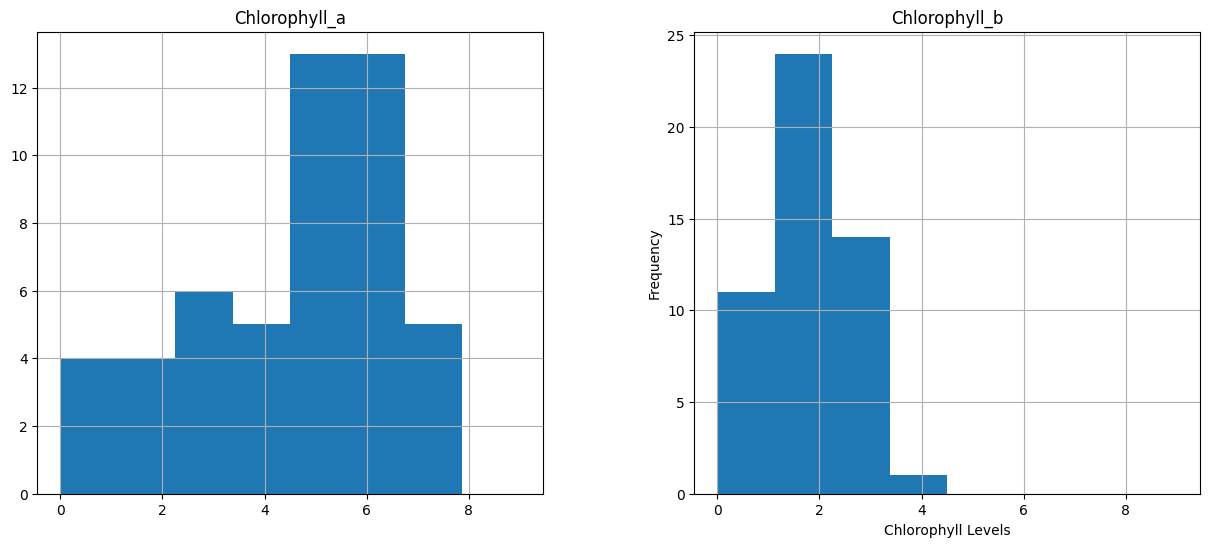

In [ ]:
Deciduous_df.hist(figsize=(15,6),bins=8, range=(0,9))
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Frequency')
plt.show()


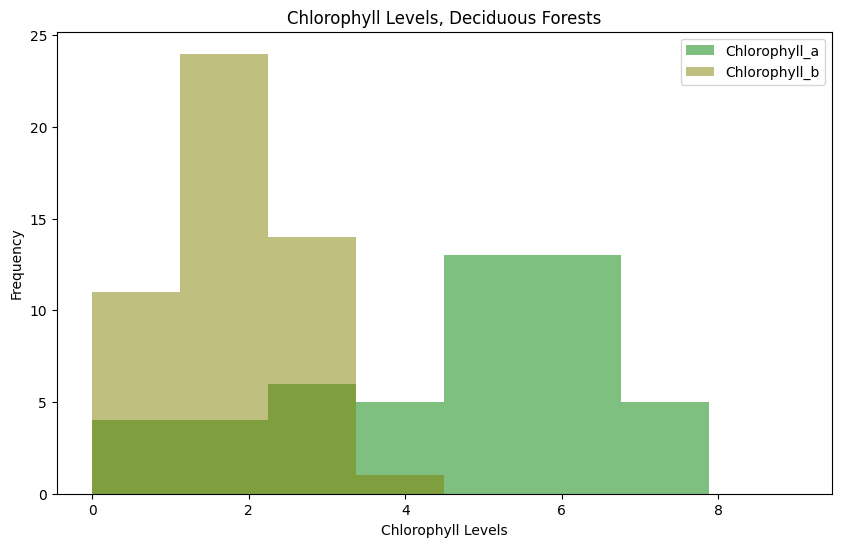

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(Deciduous_df['Chlorophyll_a'], bins=8,range=(0,9), alpha=0.5, label='Chlorophyll_a', color='green')
plt.hist(Deciduous_df['Chlorophyll_b'], bins=8,range=(0,9), alpha=0.5, label='Chlorophyll_b', color='olive')
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Chlorophyll Levels, Deciduous Forests')
plt.show()


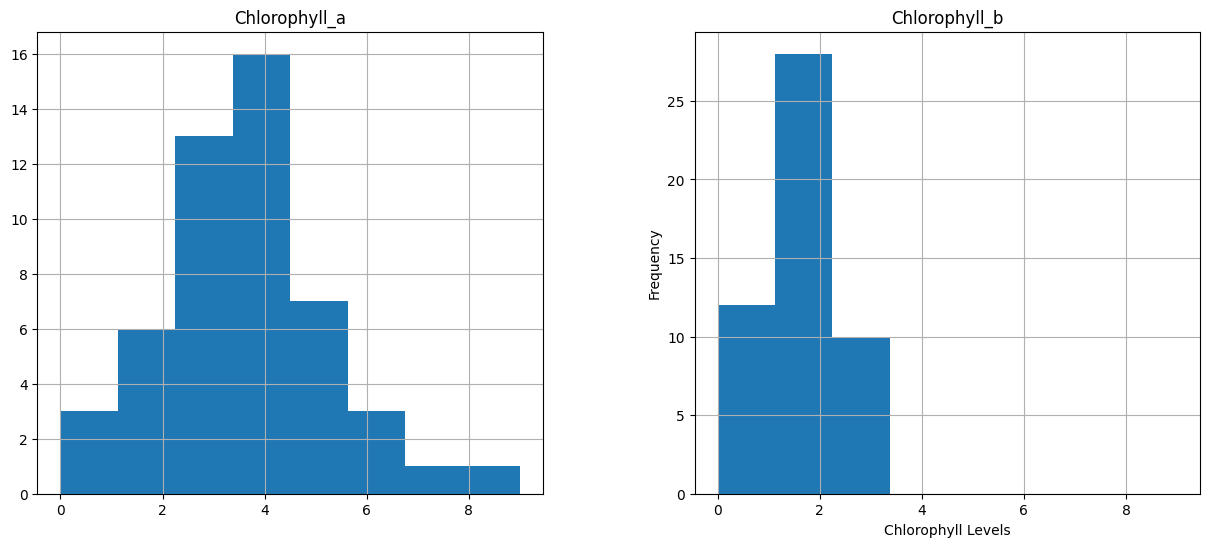

In [ ]:
Evergreen_df.hist(figsize=(15,6),bins=8, range=(0,9))
#labelling and title
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Frequency')
plt.show()

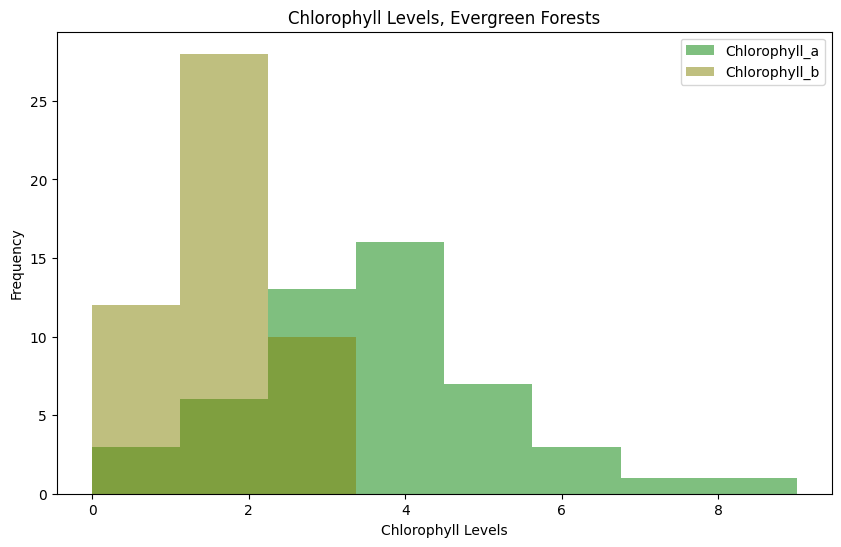

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(Evergreen_df['Chlorophyll_a'], bins=8,range=(0,9), alpha=0.5, label='Chlorophyll_a', color='green')
plt.hist(Evergreen_df['Chlorophyll_b'], bins=8,range=(0,9), alpha=0.5, label='Chlorophyll_b', color='olive')
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Chlorophyll Levels, Evergreen Forests')
plt.show()

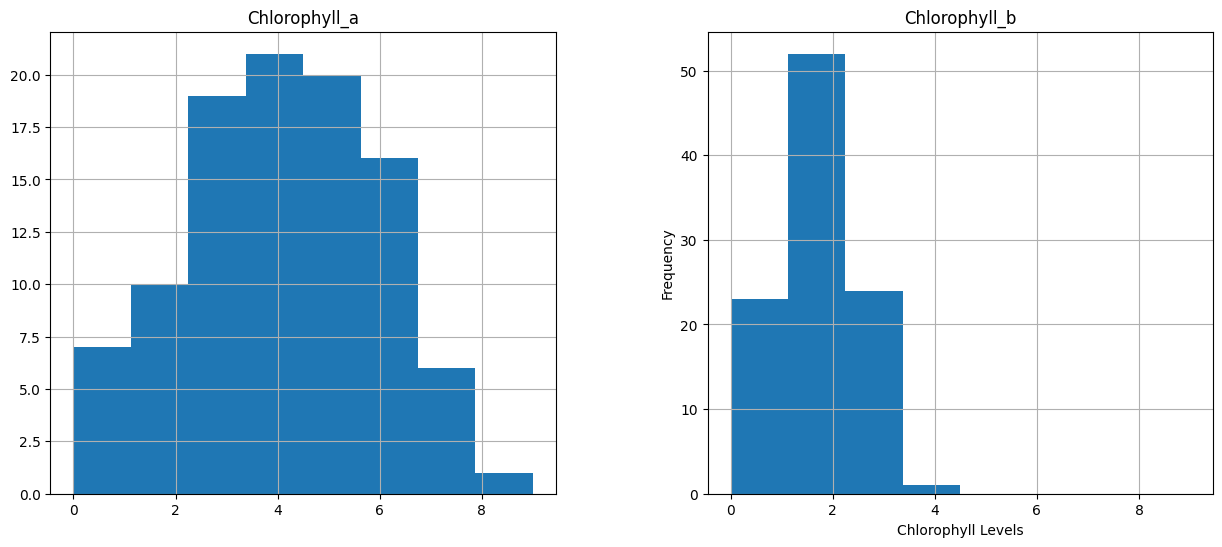

In [ ]:
df.hist(figsize=(15,6),bins=8, range=(0,9))
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Frequency')
plt.show()


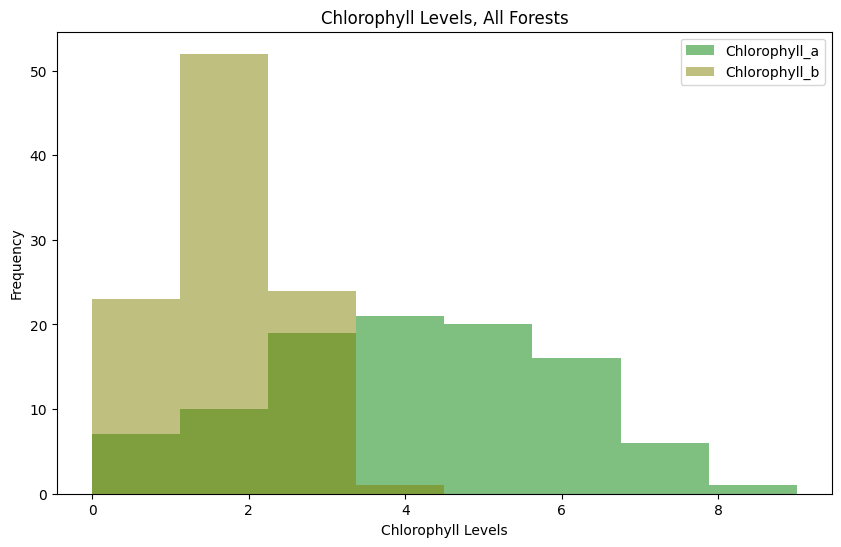

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Chlorophyll_a'], bins=8,range=(0,9), alpha=0.5, label='Chlorophyll_a', color='green')
plt.hist(df['Chlorophyll_b'], bins=8,range=(0,9), alpha=0.5, label='Chlorophyll_b', color='olive')
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Chlorophyll Levels, All Forests')
plt.show()

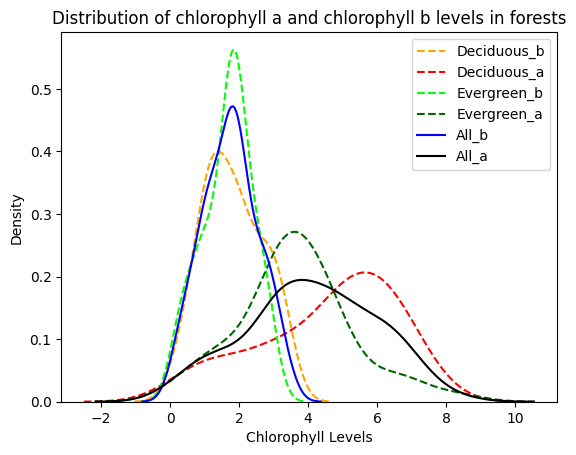

In [ ]:
# 1, 2 and 3 in same plot together as density plot
sns.kdeplot(Deciduous_df['Chlorophyll_b'], label='Deciduous_b',color='orange', linestyle='dashed')
sns.kdeplot(Deciduous_df['Chlorophyll_a'], label='Deciduous_a',color='red', linestyle='dashed')
sns.kdeplot(Evergreen_df['Chlorophyll_b'], label='Evergreen_b',color='lime', linestyle='dashed')
sns.kdeplot(Evergreen_df['Chlorophyll_a'], label='Evergreen_a',color='darkgreen', linestyle='dashed')
sns.kdeplot(df['Chlorophyll_b'], label='All_b',color='blue')
sns.kdeplot(df['Chlorophyll_a'], label='All_a',color='black')
plt.xlabel('Chlorophyll Levels')
plt.ylabel('Density')
plt.title('Distribution of chlorophyll a and chlorophyll b levels in forests')
plt.legend()
plt.show()

In [ ]:
def summary_stats(df, group_name):
    print(f"\nSummary statistics for {group_name}:")
    for col in ['Chlorophyll_a', 'Chlorophyll_b']:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()  # Access the first mode value
        if isinstance(mode, pd.Series) and len(mode) == len(df[col]):
            mode_val = np.nan  #get first mode value
        else:
            mode_val=mode[0]
        std = df[col].std()
        print(f"\n{col}:")
        print(f"  Mean: {mean:.3f}")
        print(f"  Median: {median:.3f}")
        print(f"  Mode: {mode_val:.3f}")
        print(f"  Standard Deviation: {std:.3f}")


summary_stats(Deciduous_df, "Deciduous Forests")
summary_stats(Evergreen_df, "Evergreen Forests")
summary_stats(df, "All Forests")


Summary statistics for Deciduous Forests:

Chlorophyll_a:
  Mean: 4.564
  Median: 4.975
  Mode: nan
  Standard Deviation: 1.964

Chlorophyll_b:
  Mean: 1.818
  Median: 1.764
  Mode: nan
  Standard Deviation: 0.864

Summary statistics for Evergreen Forests:

Chlorophyll_a:
  Mean: 3.626
  Median: 3.531
  Mode: nan
  Standard Deviation: 1.643

Chlorophyll_b:
  Mean: 1.666
  Median: 1.781
  Mode: nan
  Standard Deviation: 0.719

Summary statistics for All Forests:

Chlorophyll_a:
  Mean: 4.095
  Median: 4.099
  Mode: nan
  Standard Deviation: 1.862

Chlorophyll_b:
  Mean: 1.742
  Median: 1.769
  Mode: nan
  Standard Deviation: 0.794


In [ ]:
# Calculate summary statistics for Chlorophyll a and b
def summary_stats(df, group_name):
    stats = []  # Initialize an empty list to store results for each group
    for col in ['Chlorophyll_a', 'Chlorophyll_b']:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()  # Access the first mode value
        if isinstance(mode, pd.Series) and len(mode) == len(df[col]):
            mode_val = np.nan  # get first mode value if many modes
        else:
            mode_val = mode[0]  # mode is just a single value not a series
        std = df[col].std()

        stats.append([col, mean, median, mode_val, std]) # Append the results to the stats list

    # Create a DataFrame from the gathered statistics
    stats_df = pd.DataFrame(stats, columns=['Chlorophyll Type', 'Mean', 'Median', 'Mode', 'Standard Deviation'])
    stats_df['Forest Type'] = group_name  # Add the forest type to each row

    return stats_df

# Calculate and store the summary statistics
summary_data = pd.concat([
    summary_stats(Deciduous_df, "Deciduous Forests"),
    summary_stats(Evergreen_df, "Evergreen Forests"),
    summary_stats(df, "All Forests")
])

# Reset the index to make the index sequential
summary_data.reset_index(drop=True,inplace=True)

# Set 'Forest Type' and 'Chlorophyll Type' as multi-index
summary_data.set_index(['Forest Type', 'Chlorophyll Type'], inplace=True)
summary_data["Variance"]=(summary_data.iloc[:,3])**2


summary_data

Mean    Median  Mode  \
Forest Type       Chlorophyll Type                             
Deciduous Forests Chlorophyll_a     4.564366  4.974721   NaN   
                  Chlorophyll_b     1.817811  1.763595   NaN   
Evergreen Forests Chlorophyll_a     3.625706  3.531464   NaN   
                  Chlorophyll_b     1.666338  1.781322   NaN   
All Forests       Chlorophyll_a     4.095036  4.098685   NaN   
                  Chlorophyll_b     1.742074  1.769393   NaN   

                                    Standard Deviation  Variance  
Forest Type       Chlorophyll Type                                
Deciduous Forests Chlorophyll_a               1.964399  3.858863  
                  Chlorophyll_b               0.863713  0.746000  
Evergreen Forests Chlorophyll_a               1.642608  2.698161  
                  Chlorophyll_b               0.718783  0.516649  
All Forests       Chlorophyll_a               1.862227  3.467891  
                  Chlorophyll_b               0.794192  0.630741

Text(0, 0.5, 'Chlorophyll levels')

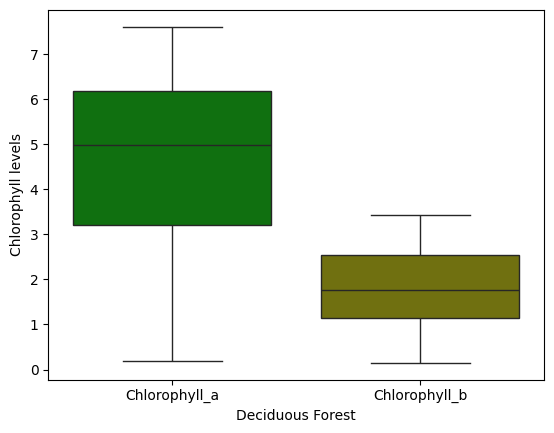

In [ ]:
sns.boxplot(Deciduous_df, palette = {'Chlorophyll_a' : 'green', 'Chlorophyll_b' : 'olive'})
plt.xlabel('Deciduous Forest')
plt.ylabel('Chlorophyll levels')

Text(0, 0.5, 'Chlorophyll levels')

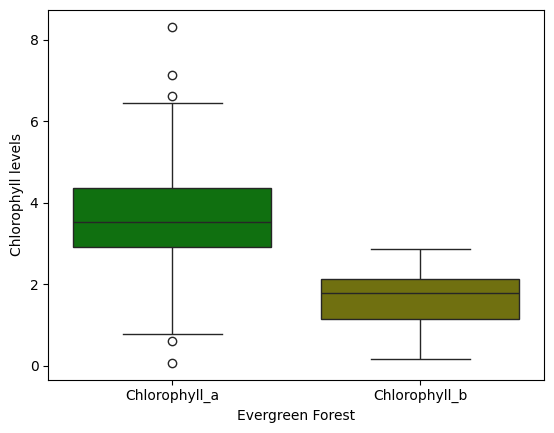

In [ ]:
sns.boxplot(Evergreen_df, palette = {'Chlorophyll_a' : 'green', 'Chlorophyll_b' : 'olive'})
plt.xlabel('Evergreen Forest')
plt.ylabel('Chlorophyll levels')

In [ ]:
summary_data.iloc[:,4]

Forest Type        Chlorophyll Type
Deciduous Forests  Chlorophyll_a       3.858863
                   Chlorophyll_b       0.746000
Evergreen Forests  Chlorophyll_a       2.698161
                   Chlorophyll_b       0.516649
All Forests        Chlorophyll_a       3.467891
                   Chlorophyll_b       0.630741
Name: Variance, dtype: float64

In [ ]:
#Checking if Variances differ significantly for the 3 cases using F-test
dec_var_a=summary_data.iloc[0,4]
dec_var_b=summary_data.iloc[1,4]

#ddof
ddof_def_a=len(Deciduous_df)-1
ddof_def_b=len(Deciduous_df)-1

F_dash_d=dec_var_a/dec_var_b


alpha=0.05

F_d=scipy.stats.f.ppf(1-alpha, ddof_def_a, ddof_def_b)

print(F_dash_d,F_d)

5.172739989807805 1.6072894627459253


In [ ]:

if F_dash_d > F_d:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")


Reject the null hypothesis. Variances are significantly different.


In [ ]:
everg_var_a=summary_data.iloc[2,4]
everg_var_b=summary_data.iloc[3,4]

#ddof
ddof_everg_a=len(Evergreen_df)-1
ddof_everg_b=len(Evergreen_df)-1

F_dash_e=everg_var_a/everg_var_b

F_e=scipy.stats.f.ppf(1-alpha, ddof_everg_a, ddof_everg_b)

print(F_dash_e,F_e)

5.22242117414268 1.6072894627459253


In [ ]:
if F_dash_e > F_e:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")

Reject the null hypothesis. Variances are significantly different.


In [ ]:
both_var_a=summary_data.iloc[4,4]
both_var_b=summary_data.iloc[5,4]

#ddof
ddof_both_a=len(df)-1
ddof_both_b=len(df)-1

F_dash_b=both_var_a/both_var_b

F_b=scipy.stats.f.ppf(1-alpha, ddof_both_a, ddof_both_b)

print(F_dash_b,F_b)

5.498117349147784 1.3940612573481483


In [ ]:
if F_dash_b > F_b:
    print("Reject the null hypothesis. Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. Variances are not significantly different.")

Reject the null hypothesis. Variances are significantly different.


In [ ]:
summary_data.iloc[:,0]

Forest Type        Chlorophyll Type
Deciduous Forests  Chlorophyll_a       4.564366
                   Chlorophyll_b       1.817811
Evergreen Forests  Chlorophyll_a       3.625706
                   Chlorophyll_b       1.666338
All Forests        Chlorophyll_a       4.095036
                   Chlorophyll_b       1.742074
Name: Mean, dtype: float64

In [ ]:
#For Deciduous Forests
t_statistic_d, p_value_d = scipy.stats.ttest_rel(Deciduous_df["Chlorophyll_a"], Deciduous_df["Chlorophyll_b"], alternative='greater')
print(f"Deciduous Forests: t-statistic = {t_statistic_d}, p-value = {p_value_d}")
if p_value_d < alpha:
    print("Reject the null hypothesis. Chlorophyll a levels are significantly greater than Chlorophyll b levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

#For Evergreen Forests
t_statistic_e, p_value_e = scipy.stats.ttest_rel(Evergreen_df["Chlorophyll_a"], Evergreen_df["Chlorophyll_b"], alternative='greater')
print(f"Evergreen Forests: t-statistic = {t_statistic_e:}, p-value = {p_value_e:}")
if p_value_e < alpha:
    print("Reject the null hypothesis. Chlorophyll a levels are significantly greater than Chlorophyll b levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

#For all Forests
t_statistic_b, p_value_b = scipy.stats.ttest_rel(df["Chlorophyll_a"], df["Chlorophyll_b"], alternative='greater')
print(f"All Forests: t-statistic = {t_statistic_b:}, p-value = {p_value_b:}")
if p_value_b < alpha:
    print("Reject the null hypothesis. Chlorophyll a levels are significantly greater than Chlorophyll b levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Deciduous Forests: t-statistic = 9.105133906250211, p-value = 2.0561959831830027e-12
Reject the null hypothesis. Chlorophyll a levels are significantly greater than Chlorophyll b levels.
Evergreen Forests: t-statistic = 7.452897833871622, p-value = 6.614613148891291e-10
Reject the null hypothesis. Chlorophyll a levels are significantly greater than Chlorophyll b levels.
All Forests: t-statistic = 11.593946975911505, p-value = 1.9048682268704486e-20
Reject the null hypothesis. Chlorophyll a levels are significantly greater than Chlorophyll b levels.
